# Анализ данных о вине

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings("ignore")

# Настройка отображения графиков
plt.style.use("seaborn-v0_8")
%matplotlib inline

In [2]:
# Загрузка данных
df = pd.read_csv("data/WineDataset.csv")
print("Размер датасета:", df.shape)
df.head()

Размер датасета: (178, 14)


,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


## 1. Исследовательский анализ данных

In [3]:
# Базовая статистика
print("Базовая статистика датасета:")
df.describe()

Базовая статистика датасета:


,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [4]:
# Проверка на пропущенные значения
print("Пропущенные значения:")
print(df.isnull().sum())

Пропущенные значения:
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Wine                            0
dtype: int64


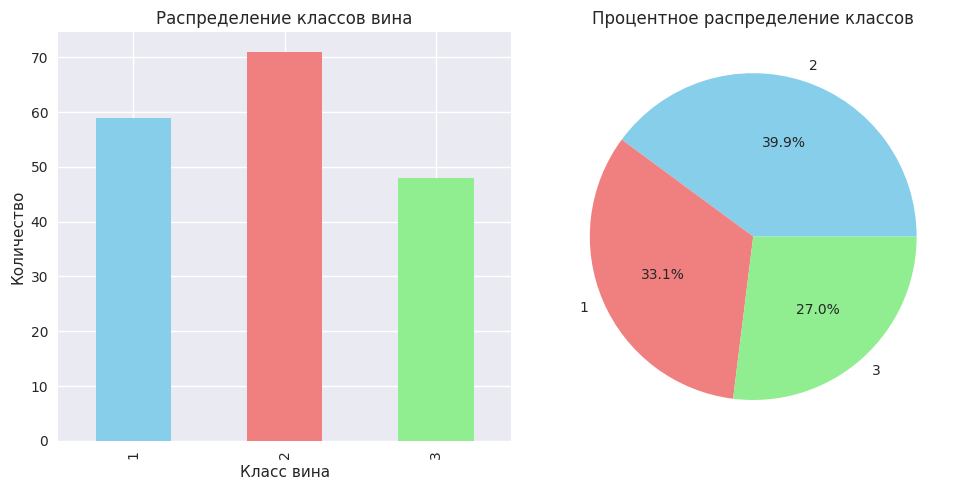

In [5]:
# Распределение классов
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['Wine'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("Распределение классов вина")
plt.xlabel("Класс вина")
plt.ylabel("Количество")

plt.subplot(1, 2, 2)
df['Wine'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("Процентное распределение классов")
plt.ylabel("")

plt.tight_layout()
plt.show()

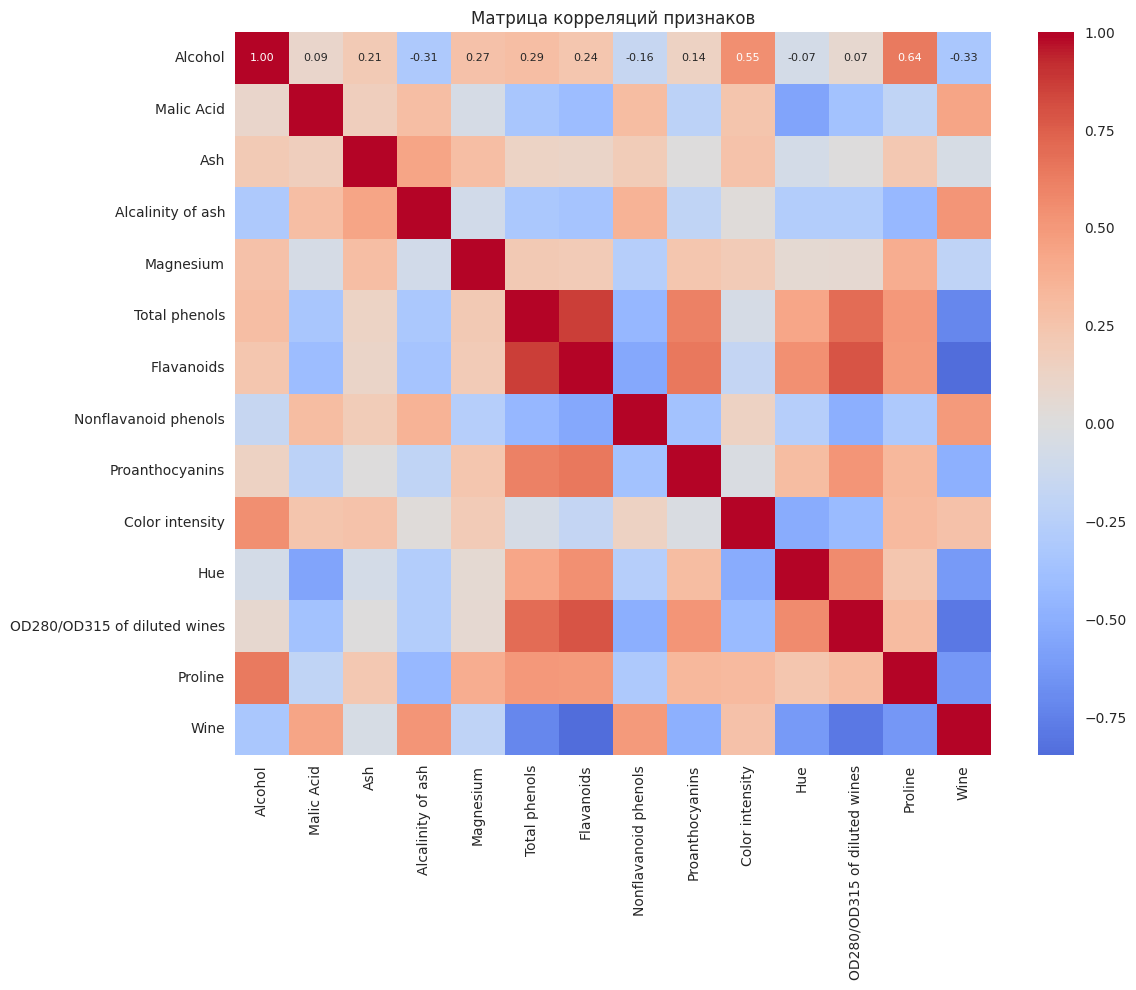

In [6]:
# Матрица корреляций
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
            annot_kws={"size": 8})
plt.title("Матрица корреляций признаков")
plt.tight_layout()
plt.show()

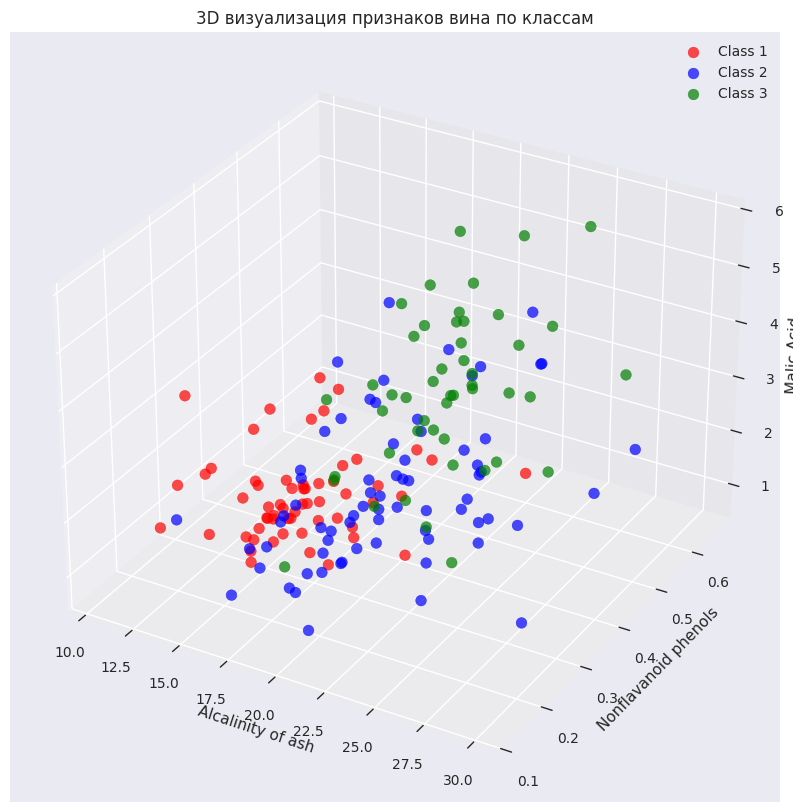

Использованные признаки для 3D визуализации: ['Alcalinity of ash', 'Nonflavanoid phenols', 'Malic Acid']


In [7]:
# 3D-визуализация признаков
fig = plt.figure(figsize=(15, 10))

# Выбираем три наиболее коррелированных с целевой переменной признака
corr_with_target = df.corr()['Wine'].sort_values(ascending=False)
top_features = corr_with_target.index[1:4]  # исключаем саму целевую переменную

ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green']
for i, wine_class in enumerate(df['Wine'].unique()):
    class_data = df[df['Wine'] == wine_class]
    ax.scatter(class_data[top_features[0]], 
              class_data[top_features[1]], 
              class_data[top_features[2]], 
              c=colors[i], 
              label=f'Class {wine_class}',
              alpha=0.7,
              s=60)

ax.set_xlabel(top_features[0])
ax.set_ylabel(top_features[1])
ax.set_zlabel(top_features[2])
ax.set_title('3D визуализация признаков вина по классам')
ax.legend()

plt.show()

print(f"Использованные признаки для 3D визуализации: {list(top_features)}")

## 2. Предварительная обработка данных

In [8]:
# Проверка и обработка пропущенных значений
print("Пропущенные значения до обработки:")
print(df.isnull().sum())

# Заполнение пропущенных значений медианой (если есть)
df = df.fillna(df.median())

print("\nПропущенные значения после обработки:")
print(df.isnull().sum())

Пропущенные значения до обработки:
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Wine                            0
dtype: int64

Пропущенные значения после обработки:
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                      

In [9]:
# Масштабирование признаков
scaler = StandardScaler()

# Разделение на признаки и целевую переменную
X = df.drop('Wine', axis=1)
y = df['Wine']

# Масштабирование
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Данные после масштабирования:")
print(X_scaled.describe())

# Объединение обратно в один датафрейм
df_scaled = X_scaled.copy()
df_scaled['Wine'] = y

Данные после масштабирования:
            Alcohol    Malic Acid           Ash  Alcalinity of ash  \
count  1.780000e+02  1.780000e+02  1.780000e+02       1.780000e+02   
mean  -8.382808e-16 -1.197544e-16 -8.370333e-16      -3.991813e-17   
std    1.002821e+00  1.002821e+00  1.002821e+00       1.002821e+00   
min   -2.434235e+00 -1.432983e+00 -3.679162e+00      -2.671018e+00   
25%   -7.882448e-01 -6.587486e-01 -5.721225e-01      -6.891372e-01   
50%    6.099988e-02 -4.231120e-01 -2.382132e-02       1.518295e-03   
75%    8.361286e-01  6.697929e-01  6.981085e-01       6.020883e-01   
max    2.259772e+00  3.109192e+00  3.156325e+00       3.154511e+00   

          Magnesium  Total phenols    Flavanoids  Nonflavanoid phenols  \
count  1.780000e+02     178.000000  1.780000e+02          1.780000e+02   
mean  -3.991813e-17       0.000000 -3.991813e-16          3.592632e-16   
std    1.002821e+00       1.002821  1.002821e+00          1.002821e+00   
min   -2.088255e+00      -2.107246 -1.69597

## 3. Реализация k-NN с нуля

In [10]:
class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            # Вычисляем расстояния до всех точек обучающей выборки
            distances = np.sqrt(np.sum((self.X_train - X[i])**2, axis=1))
            
            # Получаем индексы k ближайших соседей
            k_indices = np.argsort(distances)[:self.k]
            
            # Получаем метки k ближайших соседей
            k_nearest_labels = self.y_train[k_indices]
            
            # Выбираем наиболее частую метку
            most_common = np.bincount(k_nearest_labels).argmax()
            predictions.append(most_common)
            
        return np.array(predictions)
    
    def accuracy(self, X_test, y_test):
        predictions = self.predict(X_test)
        return np.sum(predictions == y_test) / len(y_test)

## 4. Подготовка данных и построение моделей

In [11]:
# Разделение на train/test
X = df_scaled.drop('Wine', axis=1)
y = df_scaled['Wine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Распределение классов в тренировочной выборке:")
print(y_train.value_counts().sort_index())
print(f"Распределение классов в тестовой выборке:")
print(y_test.value_counts().sort_index())

Размер тренировочной выборки: (124, 13)
Размер тестовой выборки: (54, 13)
Распределение классов в тренировочной выборке:
Wine
1    41
2    50
3    33
Name: count, dtype: int64
Распределение классов в тестовой выборке:
Wine
1    18
2    21
3    15
Name: count, dtype: int64


In [12]:
# Модель 1: Случайный набор признаков
print("=" * 50)
print("МОДЕЛЬ 1: Случайный набор признаков")
print("=" * 50)

# Выбираем 5 случайных признаков
np.random.seed(42)
random_features = np.random.choice(X.columns, size=5, replace=False)
print(f"Случайно выбранные признаки: {list(random_features)}")

X_train_1 = X_train[random_features].values
X_test_1 = X_test[random_features].values

# Тестируем различные значения k
k_values = [1, 3, 5, 7, 10]
accuracy_results_1 = []

for k in k_values:
    knn = KNearestNeighbors(k=k)
    knn.fit(X_train_1, y_train.values)
    accuracy = knn.accuracy(X_test_1, y_test.values)
    accuracy_results_1.append(accuracy)
    print(f"k = {k}: Точность = {accuracy:.4f}")

# Строим матрицу ошибок для лучшего k
best_k_idx_1 = np.argmax(accuracy_results_1)
best_k_1 = k_values[best_k_idx_1]
print(f"\nЛучшее k для модели 1: {best_k_1}")

knn_best_1 = KNearestNeighbors(k=best_k_1)
knn_best_1.fit(X_train_1, y_train.values)
y_pred_1 = knn_best_1.predict(X_test_1)

cm_1 = confusion_matrix(y_test, y_pred_1)
print("Матрица ошибок для лучшей модели 1:")
print(cm_1)

МОДЕЛЬ 1: Случайный набор признаков
Случайно выбранные признаки: ['OD280/OD315 of diluted wines', 'Color intensity', 'Alcohol', 'Proanthocyanins', 'Total phenols']
k = 1: Точность = 0.9259
k = 3: Точность = 0.9074
k = 5: Точность = 0.8704
k = 7: Точность = 0.8889
k = 10: Точность = 0.8889

Лучшее k для модели 1: 1
Матрица ошибок для лучшей модели 1:
[[18  0  0]
 [ 2 17  2]
 [ 0  0 15]]


In [13]:
# Модель 2: Фиксированный набор признаков
print("\n" + "=" * 50)
print("МОДЕЛЬ 2: Фиксированный набор признаков")
print("=" * 50)

# Выбираем признаки с наибольшей корреляцией с целевой переменной
corr_with_target = df.corr()['Wine'].sort_values(ascending=False)
fixed_features = corr_with_target.index[1:6]  # Топ-5 наиболее коррелированных признаков
print(f"Фиксированные признаки: {list(fixed_features)}")

X_train_2 = X_train[fixed_features].values
X_test_2 = X_test[fixed_features].values

# Тестируем различные значения k
accuracy_results_2 = []

for k in k_values:
    knn = KNearestNeighbors(k=k)
    knn.fit(X_train_2, y_train.values)
    accuracy = knn.accuracy(X_test_2, y_test.values)
    accuracy_results_2.append(accuracy)
    print(f"k = {k}: Точность = {accuracy:.4f}")

# Строим матрицу ошибок для лучшего k
best_k_idx_2 = np.argmax(accuracy_results_2)
best_k_2 = k_values[best_k_idx_2]
print(f"\nЛучшее k для модели 2: {best_k_2}")

knn_best_2 = KNearestNeighbors(k=best_k_2)
knn_best_2.fit(X_train_2, y_train.values)
y_pred_2 = knn_best_2.predict(X_test_2)

cm_2 = confusion_matrix(y_test, y_pred_2)
print("Матрица ошибок для лучшей модели 2:")
print(cm_2)


МОДЕЛЬ 2: Фиксированный набор признаков
Фиксированные признаки: ['Alcalinity of ash', 'Nonflavanoid phenols', 'Malic Acid', 'Color intensity', 'Ash']
k = 1: Точность = 0.8519
k = 3: Точность = 0.8889
k = 5: Точность = 0.8519
k = 7: Точность = 0.8519
k = 10: Точность = 0.8519

Лучшее k для модели 2: 3
Матрица ошибок для лучшей модели 2:
[[18  0  0]
 [ 2 17  2]
 [ 1  1 13]]


## 5. Сравнение моделей и визуализация результатов

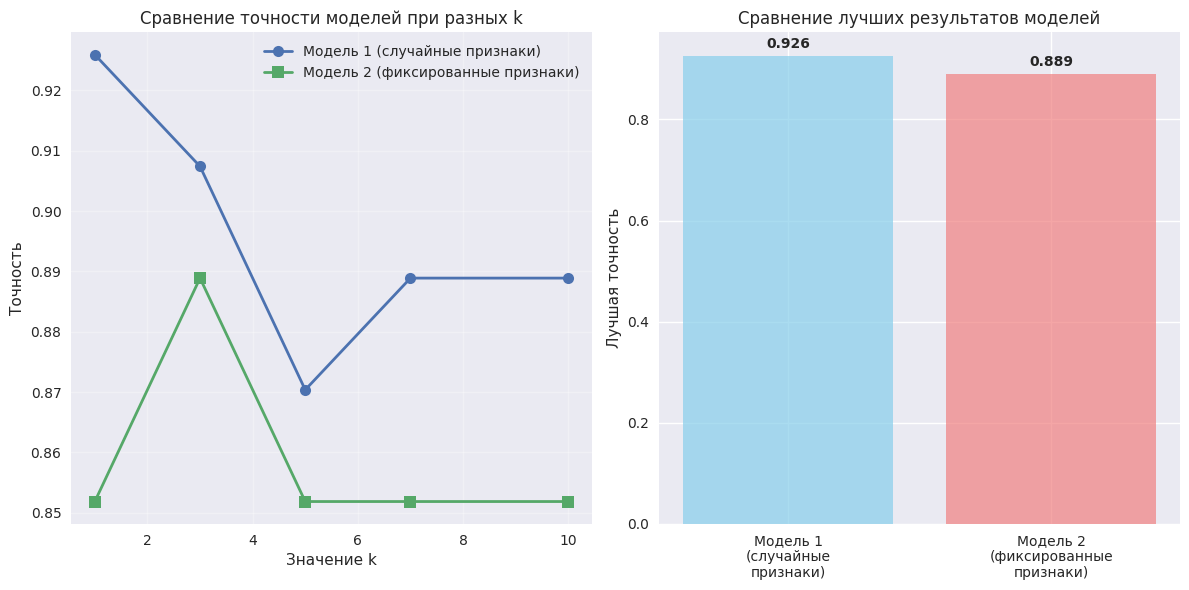

In [14]:
# Сравнение точности моделей
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, accuracy_results_1, 'o-', linewidth=2, markersize=8, label='Модель 1 (случайные признаки)')
plt.plot(k_values, accuracy_results_2, 's-', linewidth=2, markersize=8, label='Модель 2 (фиксированные признаки)')
plt.xlabel('Значение k')
plt.ylabel('Точность')
plt.title('Сравнение точности моделей при разных k')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
models = ['Модель 1\n(случайные\nпризнаки)', 'Модель 2\n(фиксированные\nпризнаки)']
best_accuracies = [max(accuracy_results_1), max(accuracy_results_2)]
bars = plt.bar(models, best_accuracies, color=['skyblue', 'lightcoral'], alpha=0.7)
plt.ylabel('Лучшая точность')
plt.title('Сравнение лучших результатов моделей')

for bar, accuracy in zip(bars, best_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{accuracy:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

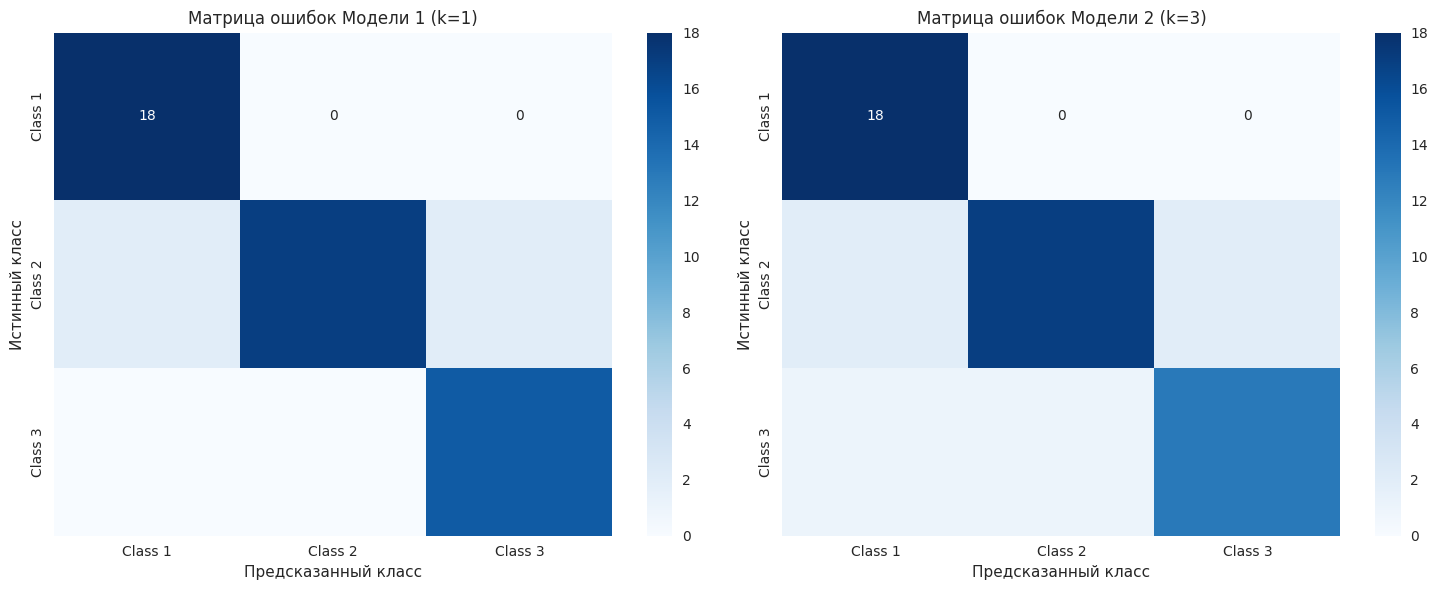

In [15]:
# Визуализация матриц ошибок
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Матрица ошибок для модели 1
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
ax1.set_title(f'Матрица ошибок Модели 1 (k={best_k_1})')
ax1.set_xlabel('Предсказанный класс')
ax1.set_ylabel('Истинный класс')

# Матрица ошибок для модели 2
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
ax2.set_title(f'Матрица ошибок Модели 2 (k={best_k_2})')
ax2.set_xlabel('Предсказанный класс')
ax2.set_ylabel('Истинный класс')

plt.tight_layout()
plt.show()

In [16]:
# Детальный анализ лучшей модели
best_model_idx = 0 if max(accuracy_results_1) > max(accuracy_results_2) else 1
best_model_name = "Модель 1 (случайные признаки)" if best_model_idx == 0 else "Модель 2 (фиксированные признаки)"
best_accuracy = max(accuracy_results_1) if best_model_idx == 0 else max(accuracy_results_2)
best_k = best_k_1 if best_model_idx == 0 else best_k_2

print("=" * 60)
print("АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ")
print("=" * 60)
print(f"Лучшая модель: {best_model_name}")
print(f"Лучшее значение k: {best_k}")
print(f"Точность на тестовых данных: {best_accuracy:.4f}")
print(f"Процент правильных классификаций: {best_accuracy*100:.2f}%")

# Анализ использованных признаков
if best_model_idx == 0:
    print(f"\nИспользованные признаки: {list(random_features)}")
else:
    print(f"\nИспользованные признаки: {list(fixed_features)}")
    
print("\nИнтерпретация результатов:")
if best_model_idx == 0:
    print("- Случайный выбор признаков показал хороший результат")
    print("- Это может указывать на то, что многие признаки в датасете информативны")
else:
    print("- Выбор признаков на основе корреляции с целевой переменной оказался эффективным")
    print("- Это подтверждает важность анализа взаимосвязей признаков с целевой переменной")

print("=" * 60)

АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ
Лучшая модель: Модель 1 (случайные признаки)
Лучшее значение k: 1
Точность на тестовых данных: 0.9259
Процент правильных классификаций: 92.59%

Использованные признаки: ['OD280/OD315 of diluted wines', 'Color intensity', 'Alcohol', 'Proanthocyanins', 'Total phenols']

Интерпретация результатов:
- Случайный выбор признаков показал хороший результат
- Это может указывать на то, что многие признаки в датасете информативны


## 6. Выводы и заключение

In [17]:
print("\n" + "=" * 70)
print("ОСНОВНЫЕ ВЫВОДЫ И ЗАКЛЮЧЕНИЕ")
print("=" * 70)

print(f"\n1. КАЧЕСТВО КЛАССИФИКАЦИИ:")
print(f"   - Лучшая модель: {best_model_name}")
print(f"   - Точность: {best_accuracy:.4f} ({best_accuracy*100:.1f}%)")
print(f"   - Оптимальное k: {best_k}")

print(f"\n2. СРАВНЕНИЕ МОДЕЛЕЙ:")
print(f"   - Модель 1 (случайные признаки): макс. точность = {max(accuracy_results_1):.4f}")
print(f"   - Модель 2 (фиксированные признаки): макс. точность = {max(accuracy_results_2):.4f}")

print(f"\n3. ВЛИЯНИЕ ПАРАМЕТРА k:")
print("   - Слишком маленькие k могут приводить к переобучению")
print("   - Слишком большие k могут приводить к недобучению")
print("   - Оптимальное k обычно находится в диапазоне 3-10")

print(f"\n4. СТАТИСТИКА ДАННЫХ:")
print(f"   - Всего записей: {len(df)}")
print(f"   - Количество признаков: {len(df.columns) - 1}")
print(f"   - Количество классов: {len(df['Wine'].unique())}")
print(f"   - Распределение классов: {dict(df['Wine'].value_counts().sort_index())}")

print(f"\n5. РЕКОМЕНДАЦИИ:")
print("   - Для данного датасета k-NN показывает высокую точность классификации")
print("   - Анализ корреляции признаков помогает выбрать информативные признаки")
print("   - Масштабирование признаков критически важно для методов на основе расстояний")

print("\n" + "=" * 70)


ОСНОВНЫЕ ВЫВОДЫ И ЗАКЛЮЧЕНИЕ

1. КАЧЕСТВО КЛАССИФИКАЦИИ:
   - Лучшая модель: Модель 1 (случайные признаки)
   - Точность: 0.9259 (92.6%)
   - Оптимальное k: 1

2. СРАВНЕНИЕ МОДЕЛЕЙ:
   - Модель 1 (случайные признаки): макс. точность = 0.9259
   - Модель 2 (фиксированные признаки): макс. точность = 0.8889

3. ВЛИЯНИЕ ПАРАМЕТРА k:
   - Слишком маленькие k могут приводить к переобучению
   - Слишком большие k могут приводить к недобучению
   - Оптимальное k обычно находится в диапазоне 3-10

4. СТАТИСТИКА ДАННЫХ:
   - Всего записей: 178
   - Количество признаков: 13
   - Количество классов: 3
   - Распределение классов: {1: 59, 2: 71, 3: 48}

5. РЕКОМЕНДАЦИИ:
   - Для данного датасета k-NN показывает высокую точность классификации
   - Анализ корреляции признаков помогает выбрать информативные признаки
   - Масштабирование признаков критически важно для методов на основе расстояний

